In [ ]:
# KONVERSI PANDAS DATAFRAME
import os
import pandas as pd

os.listdir('sample_data')

df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = MinMaxScaler()
scaler.fit(data)

print(scaler.transform(data))

In [ ]:
# STANDARDIZATION

data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)

data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

In [ ]:
#PEMISAHAN DENGAN RANDOM STATE

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )

X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)


random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[2, 6, 7]
[5, 6, 2]
[1, 0, 7]


In [ ]:
#LATIHAN SKLEARN TRAIN TEST SPLIT

import sklearn
from sklearn import datasets

iris = datasets.load_iris()

x=iris.data
y=iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test)

30

In [ ]:
#LATIHAN SKLEARN CROSS VALIDATION SPLIT

import sklearn
from sklearn import datasets
 
# Load iris dataset
iris = datasets.load_iris()

# mendefinisikan atribut dan label pada dataset
x=iris.data
y=iris.target

from sklearn import tree

clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score

# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf,x,y,cv=5)

scores

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#SUPERVISED LEARNING

In [ ]:
#LATIHAN DECISION TREE

import pandas as pd
from sklearn.datasets import load_iris


iris = pd.read_csv('/content/sample_data/Iris.csv')
iris.head()

iris.drop('Id',axis=1,inplace=True)

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']


from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X, y)

tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

FileNotFoundError: ignored

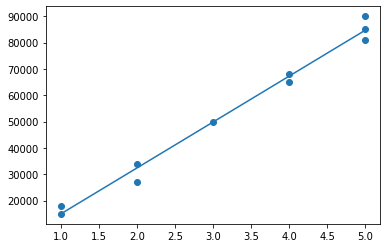

In [ ]:
#LATIHAN SKLearn LINEAR REGRESSION

import numpy as np

bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

from sklearn.linear_model import LinearRegression

bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
#LATIHAN SKLEARN LOGISTIC REGRESSION

import pandas as pd

data = pd.read_csv('/content/Social_Network_Ads.csv')
data.info()

data = data.drop(columns=['User ID'])

data = pd.get_dummies(data)
data

predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

# bagi data menjadi train dan test untuk setiap atribut dan label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=1)

# latih model dengan fungsi fit
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)


# uji akurasi model
from sklearn.preprocessing import StandardScaler
model.score(X_test, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


0.825

#UNSUPERVISED LEARNING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


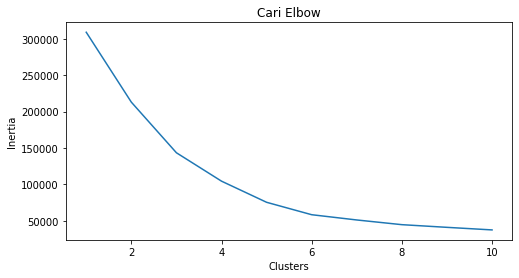

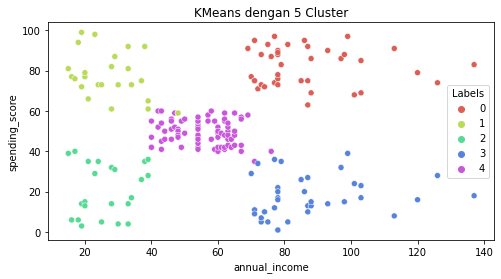

In [ ]:
# LATIHAN SKLearn K-means
import pandas as pd
 
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [ ]:
#Latihan SKLearn SVM untuk Klasifikasi

import pandas as pd

data = pd.read_csv('diabetes.csv')

# data.head()

# data.info()

X = data[data.columns[:8]]

y = data['Outcome']



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)


0.7559055118110236

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


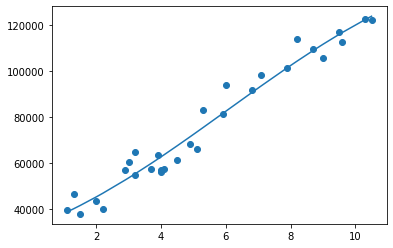

In [ ]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

data.info()

import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']
 

# mengubah bentuk atribut
X = X[:,np.newaxis]

# print(X)


from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')

parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
 
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, parameters)

grid_search.fit(X,y)

print(grid_search.best_params_)

# # melatih model dengan fungsi fit
# model.fit(X,y)

# import matplotlib.pyplot as plt
 
# # memvisualisasikan model
# plt.scatter(X, y)
# plt.plot(X, model.predict(X))

model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

In [3]:
import tensorflow as tf
print(tf.__version__)

!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


2.6.0
--2021-09-10 03:22:28--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-09-10 03:22:28--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   259MB/s    in 0.3s    

2021-09-10 03: